# Lab Notebook 2 - Classical Inference vs Machine Learning

## Step 1

We will use the same data from Lab 1 on Monday, but we will now approach this problem from a machine learning (ML) perspective. The modules, random seed, and data are set up as before:

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
np.random.seed(11) 
x = np.arange(-10,10+2,2) 
y = 2*x**2 - 3*x - 1 + np.random.randn(len(x))*10 

Set your graph parameters (with matplotlib.rc) and plot the data as before.

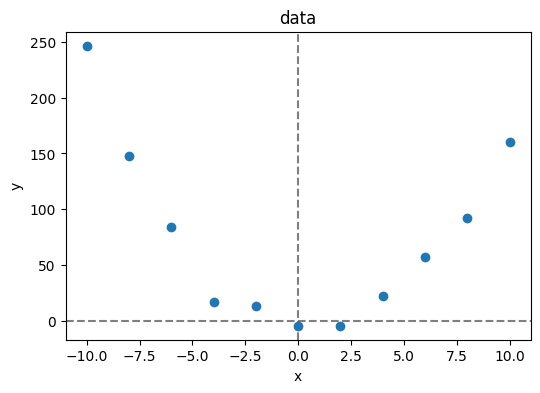

In [3]:
plt.figure(figsize = (6,4))
plt.scatter(x, y, zorder = 3)
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(x = 0, color = 'k', alpha = 0.5, linestyle = '--', zorder = 1)
plt.axhline(y = 0, color = 'k', alpha = 0.5, linestyle = '--', zorder = 2)
plt.title("data")
plt.show()

## Step 2

From sklearn, import DecisionTreeRegressor, LinearRegression, and train_test_split.  Using train_test_split, divide the learning set (the data we've generated above) into training and test subsets. Make sure to set test_size=3 and fix the random_state of train_test_split to 9 for reproducibility.

In [4]:
from sklearn.tree            import DecisionTreeRegressor
from sklearn.linear_model    import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 3, random_state = 9)

print('x_train:', x_train)
print('x_test :', x_test)
print('y_train:', y_train)
print('y_test :', y_test)

x_train: [-6 -8 10  8 -4  6  2  0]
x_test : [  4  -2 -10]
y_train: [ 84.15434868 148.13927003 160.1376033   92.3439702   16.46681441
  57.21050716  -4.36629362  -4.19631364]
y_test : [ 22.15402668  12.91715371 246.49454741]


## Step 3

Now, let "treemodel" be the Decision Tree Regression model (use DecisionTreeRegressor with default parameters, but fix random_state to 8 for reproducibility):

In [5]:
treemodel = DecisionTreeRegressor(random_state = 8)

Now, fit the treemodel using the training set. To do this, use treemodel.fit with inputs X_train and y_train. You will need to reshape one of these inputs.

In [6]:
model = treemodel.fit(x_train.reshape(-1, 1), y_train)
model

DecisionTreeRegressor(random_state=8)

Now, use "predict" on X_test to find the predicted y-values using the Decision Tree:

In [7]:
y_predict = model.predict(x_test.reshape(-1, 1)) 

How do the predictions compare to the actual y test values we have? To find out, print the y predictions and y_test. Plot them vs the data points (include a legend).

y_predict: [ -4.36629362  16.46681441 148.13927003]
y_test:    [ 22.15402668  12.91715371 246.49454741]


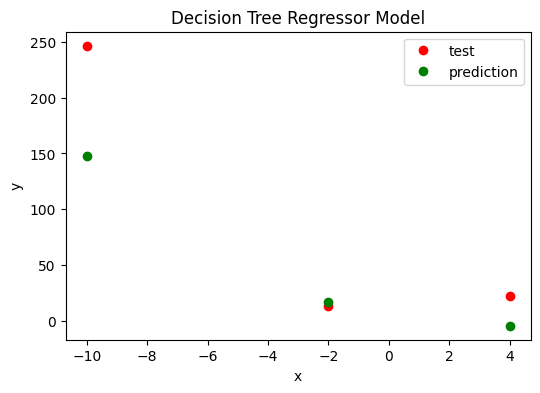

In [8]:
print('y_predict:', y_predict)
print('y_test:   ', y_test)

plt.figure(figsize = (6,4))
plt.plot(x_test, y_test, 'ro', label = "test")
plt.plot(x_test, y_predict, 'go', label = "prediction")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Decision Tree Regressor Model")
plt.legend()
plt.show()

## Step 4

Now, calculate the mean squared error for the predicted y values. The squared error is the square of the difference between predicted and observed values:

In [9]:
mse = np.sum((y_test - y_predict)**2) /len(y_test)
mse

3463.229356331205

In a similar manner, compute the mean squared error on the train data. Is it different from the test error? Does the result surprise you?

- does not suprise me, model was trained on the train data

In [10]:
y_predict = model.predict(x_train.reshape(-1, 1))
mse = np.sum((y_train - y_predict)**2)/len(y_train)
mse

0.0

Predict the y-value at x=12:

In [11]:
y_12 = model.predict([[12]])
print(y_12)

[160.1376033]


## Step 5

Now we're going to use a linear regression model on our data. 

From sklearn.preprocessing, import PolynomialFeatures. Define "poly" as the ouput of PolynomialFeatures(degree=2, include_bias=False).

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias = False)

Next, perform a fit_transform on poly with the x-array as the input. You will need to reshape x. Save the output as "poly_features" and inspect the feature matrix via print(). Are you satisfied with the result?

In [13]:
poly_features = poly.fit_transform(x.reshape(-1,1))
print(poly_features) 

[[-10. 100.]
 [ -8.  64.]
 [ -6.  36.]
 [ -4.  16.]
 [ -2.   4.]
 [  0.   0.]
 [  2.   4.]
 [  4.  16.]
 [  6.  36.]
 [  8.  64.]
 [ 10. 100.]]


Now, we'll define the training and test sets! Use train_test_split on poly_features and y with test_size=3 and random_state=9 to find X_train, X_test, y_train, y_test.

In [14]:
x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size = 3, random_state = 9)

print('x_train:', x_train)
print('x_test :', x_test)
print('y_train:', y_train)
print('y_test :', y_test)

x_train: [[ -6.  36.]
 [ -8.  64.]
 [ 10. 100.]
 [  8.  64.]
 [ -4.  16.]
 [  6.  36.]
 [  2.   4.]
 [  0.   0.]]
x_test : [[  4.  16.]
 [ -2.   4.]
 [-10. 100.]]
y_train: [ 84.15434868 148.13927003 160.1376033   92.3439702   16.46681441
  57.21050716  -4.36629362  -4.19631364]
y_test : [ 22.15402668  12.91715371 246.49454741]


Create a linear regression model "poly_reg_model". Fit it on the training set X_train and y_train. Use poly_reg_model to predict the y-values for X_test.

In [15]:
poly_reg_model = LinearRegression()
model = poly_reg_model.fit(x_train, y_train)
y_pred = model.predict(x_test)


For comparison, print the x-test, y-test, and y-predicted values. Furthermore, plot the predicted y-values alongside our generated data. Include a legend.

x_test : [[  4.  16.]
 [ -2.   4.]
 [-10. 100.]]
y_test : [ 22.15402668  12.91715371 246.49454741]
y_pred : [ 12.32360877   5.23013119 219.62046954]


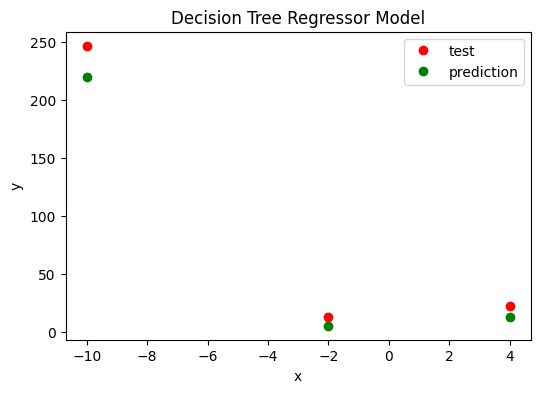

In [16]:
print('x_test :', x_test)
print('y_test :', y_test)
print('y_pred :', y_pred)

plt.figure(figsize = (6,4))
plt.plot(x_test[:,0], y_test, 'ro', label = "test")
plt.plot(x_test[:,0], y_pred, 'go', label = "prediction")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Decision Tree Regressor Model")
plt.legend()
plt.show()

## Step 6

As before for the decision tree model, calculate the mean squared error for the predicted y values, i.e. the test error:


In [17]:
mse = np.sum((y_test - y_pred)**2) /len(y_test)
print('mean squared error: ', mse)

mean squared error:  292.64783101674954


Again please also check the train error for the linear model and comment on its behavior in comparison to the decision tree.

In [18]:
y_pred = model.predict(x_train)
mse = np.sum((y_train - y_pred)**2)/len(y_train)
print('mean squared error: ', mse)

mean squared error:  69.00444940225543


Predict the y-value at x=12:

In [19]:
y_12 = model.predict([[12, 144]])
print(y_12)

[245.62988731]


Based on the results so far, which ML method is better? Why?

- linear regression seems to be better as it produces a lower mean squared error for the predicted y values of x_test.

## Step 7

An obvious question that arises is how we could improve the performance of the ML model. For the linear model, we had to create both linear and quadratic features for it to be successful. Could you improve the decision tree model by also giving it both linear and quadratic features, that is a feature matrix that contains both x and x^2?

To answer this question, create such an extended feature matrix using the exact same test/train data set from step 2, and re-fit the decision tree regressor with that new matrix. Now check the test error again, any improvement? If not, why not?

In [20]:
print('x_train: ', x_train) #check
print('')
print('x_test: ', x_test)

x_train:  [[ -6.  36.]
 [ -8.  64.]
 [ 10. 100.]
 [  8.  64.]
 [ -4.  16.]
 [  6.  36.]
 [  2.   4.]
 [  0.   0.]]

x_test:  [[  4.  16.]
 [ -2.   4.]
 [-10. 100.]]


In [21]:
model = treemodel.fit(x_train, y_train)
y_predict = model.predict(x_test) 
mse = np.sum((y_test - y_predict)**2) /len(y_test)
print('mean squared error: ', mse)

mean squared error:  3332.9919122496963


 - we notice a slight improvement

## Step 8

Another possiblity for increasing the performance of the ML models would be to increase the size of the learning set. Let's increase the number of data points by a factor of 10 by spacing the x-values 0.2 apart instead of 2, and generate the corresponding y-values, as in step 1. Find the new test error for both ML models on this enlarged data set, and comment on the result.

Careful: when you split_test_train, make sure to increase the size of the test set accordingly

If you have time and are curious, try to increase the size of the learning set even more, say by one or two orders of magnitude? Do the test errors keep changing or not?

num of points: 110
mean squared error decision_tree:  150.10145460135834
mean squared error linear_reg:  66.87545933889915


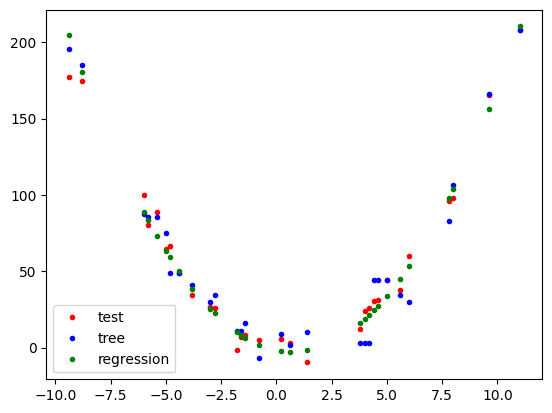

In [40]:
np.random.seed(11) 
x = np.arange(-10,10+2,0.2)
print('num of points:', len(x)) 
y = 2*x**2 - 3*x - 1 + np.random.randn(len(x))*10 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 3 * 10, random_state = 9)
x_test2 = x_test
model = treemodel.fit(x_train.reshape(-1, 1), y_train)
y_predict = model.predict(x_test.reshape(-1, 1))
mse = np.sum((y_test - y_predict)**2) /len(y_test)
print('mean squared error decision_tree: ', mse)

poly_features = poly.fit_transform(x.reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size = 3 * 10, random_state = 9)
model = poly_reg_model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = np.sum((y_test - y_pred)**2) /len(y_test)
print('mean squared error linear_reg: ', mse)
plt.plot(x_test2, y_test, 'r.', x_test2, y_predict, 'b.', x_test2, y_pred, 'g.')
plt.legend(['test', 'tree', "regression"])
plt.show()

- both mean squared errors decreased with more data.

num of points: 1100
mean squared error decision_tree:  192.68969860567566
mean squared error linear_reg:  97.92486568536236


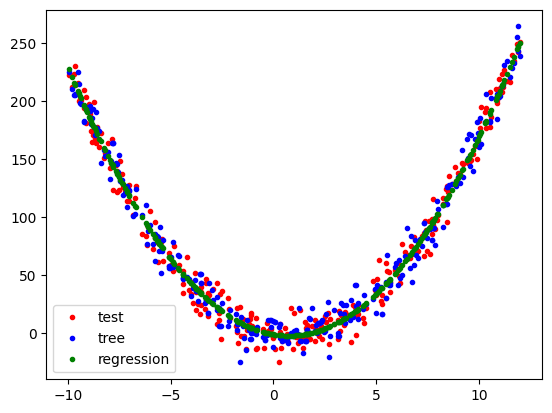

In [38]:
np.random.seed(11) 
x = np.arange(-10,10+2,0.02) 
y = 2*x**2 - 3*x - 1 + np.random.randn(len(x))*10 
print('num of points:', len(x)) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 3 * 100, random_state = 9)
x_test2 = x_test
model = treemodel.fit(x_train.reshape(-1, 1), y_train)
y_predict = model.predict(x_test.reshape(-1, 1)) 
mse = np.sum((y_test - y_predict)**2) /len(y_test)
print('mean squared error decision_tree: ', mse)

poly_features = poly.fit_transform(x.reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size = 3 * 100, random_state = 9)
model = poly_reg_model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = np.sum((y_test - y_pred)**2) /len(y_test)
print('mean squared error linear_reg: ', mse)

plt.plot(x_test2, y_test, 'r.', x_test2, y_predict, 'b.', x_test2, y_pred, 'g.')
plt.legend(['test', 'tree', "regression"])
plt.show()

num of points: 11000
mean squared error decision_tree:  195.98319635857493
mean squared error linear_reg:  99.12534403565216


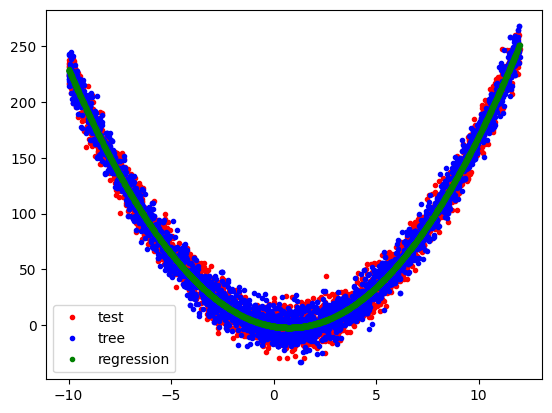

In [37]:
np.random.seed(11) 
x = np.arange(-10,10+2,0.002) 
y = 2*x**2 - 3*x - 1 + np.random.randn(len(x))*10 
print('num of points:', len(x)) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 3 * 1000, random_state = 9)
x_test2 = x_test
model = treemodel.fit(x_train.reshape(-1, 1), y_train)
y_predict = model.predict(x_test.reshape(-1, 1)) 
mse = np.sum((y_test - y_predict)**2) /len(y_test)
print('mean squared error decision_tree: ', mse)

poly_features = poly.fit_transform(x.reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size = 3 * 1000, random_state = 9)
model = poly_reg_model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = np.sum((y_test - y_pred)**2) /len(y_test)
print('mean squared error linear_reg: ', mse)

plt.plot(x_test2, y_test, 'r.', x_test2, y_predict, 'b.', x_test2, y_pred, 'g.')
plt.legend(['test', 'tree', "regression"])
plt.show()